In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv("./crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df["IsTrading"].value_counts()


True     1144
False     108
Name: IsTrading, dtype: int64

In [4]:
trading_df = df[df["IsTrading"] == True]
trading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
trading_df2 = trading_df.drop("IsTrading", axis=1)
trading_df2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
clean_df = trading_df2.dropna()
clean_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
clean_df = clean_df[clean_df["TotalCoinsMined"] >= 0]
clean_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
droppedclean_df = clean_df.drop(["CoinName","Unnamed: 0"],axis=1)
droppedclean_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
droppedclean_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [10]:
droppedclean_df["TotalCoinSupply"] = droppedclean_df["TotalCoinSupply"].astype(str).astype(float)


In [11]:
droppedclean_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [12]:
dummyclean_df=pd.get_dummies(droppedclean_df)
dummyclean_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dummyclean_df=pd.get_dummies((droppedclean_df), drop_first=True)
dummyclean_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creating dummy variables has increased the column count from 4 to 105, which is expected. The number of rows remain the same.**

In [14]:
X_scaled = StandardScaler().fit_transform(dummyclean_df)
X_scaled

array([[-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.07692584, -0.03826624, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       ...,
       [-0.07878691, -0.03826599, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10294153, -0.03826638, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10311949, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394]])

In [15]:
# Initialize PCA model
pca = PCA(n_components=0.99)

# Get two principal components for the data.
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(684, 94)

**the number of features has dropped**

In [16]:
pca.explained_variance_ratio_

array([0.02123678, 0.01999453, 0.01912102, 0.01907551, 0.01907551,
       0.01907551, 0.01904001, 0.01699565, 0.01628921, 0.01527723,
       0.01508889, 0.01485026, 0.01441695, 0.01336966, 0.01187879,
       0.01183401, 0.0113872 , 0.01099029, 0.01032331, 0.0097976 ,
       0.00977861, 0.00970641, 0.00968732, 0.00967003, 0.00964911,
       0.00961475, 0.00959342, 0.00959021, 0.00958556, 0.00958284,
       0.00957983, 0.00957983, 0.00957983, 0.0095789 , 0.00957184,
       0.00957017, 0.00956576, 0.00956576, 0.00956576, 0.00955871,
       0.00955719, 0.00955582, 0.00955205, 0.00955174, 0.00955113,
       0.00955078, 0.0095479 , 0.00954575, 0.0095446 , 0.00953776,
       0.00953775, 0.00953775, 0.00953775, 0.00953775, 0.00953775,
       0.00953775, 0.00953775, 0.00953775, 0.00953775, 0.00953775,
       0.00953775, 0.00953775, 0.00953775, 0.00953775, 0.00953775,
       0.00953775, 0.00953775, 0.00953775, 0.00953775, 0.00953775,
       0.00953775, 0.00953775, 0.00953775, 0.00953775, 0.00953

In [17]:
sum(pca.explained_variance_ratio_)

0.9913939617270442

In [18]:
tsne = TSNE(n_components=2, perplexity=30.0)

# Apply a fit-transform
tsne_features = tsne.fit_transform(X_scaled)
tsne_features.shape

(684, 2)

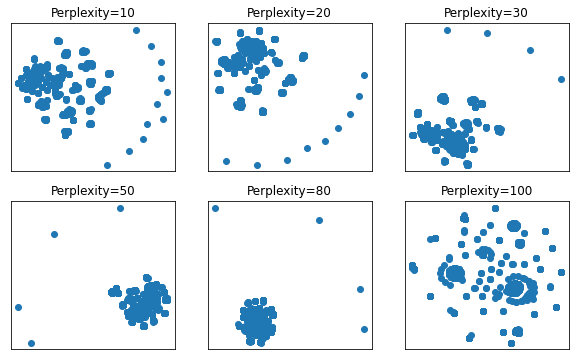

In [19]:
perplexity_list = [10, 20, 30, 50, 80, 100]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, p in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_features = tsne.fit_transform(X_scaled)
    axs[i].scatter(tsne_features[:,0], tsne_features[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()

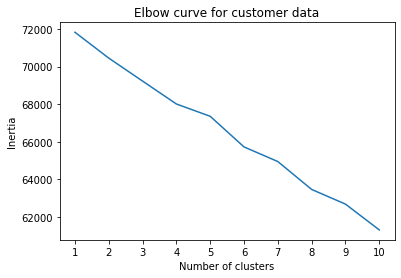

In [20]:
inertia = []
k_list = [1,2,3,4,5,6,7,8,9,10]
# Looking for the best k
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

**The elbow of the plot appears to be at 4 (number of clusters)**

**RECOMMENDATIONS:**

Based on the above elbow currve, the cryptocurrencies can be clustered together into 4 clusters.